In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import jieba
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/tiancaixiaohuoban/Desktop/高礼/互联网与文本分析/lec04/homework1_钟东彤_2020200883_stockid000825_100条.csv',encoding='GBK')
data.head()

Unnamed: 0                                              title        date  \
0           0                          太钢不锈：独立董事提名人声明(王东升)（下载公告）  2022-09-29   
1           1                               太钢不锈：独立董事事前认可函（下载公告）  2022-09-29   
2           2                                  太钢不锈：独立董事意见（下载公告）  2022-09-29   
3           3  太钢不锈：上海市锦天城律师事务所关于山西太钢不锈钢股份有限公司2021年A股限制性股票激励计...  2022-09-29   
4           4                          太钢不锈：独立董事提名人声明(毛新平)（下载公告）  2022-09-29   

                                                 url  \
0  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   
1  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   
2  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   
3  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   
4  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   

                                             content    type  
0  \n证券代码：000825    证券简称：太钢不锈    公告编号：2022-069山西太...    临时公告  
1  \n根据《深圳证券交易所股票上市规则》有关规定，本人作为山西太钢不锈钢股份有限公司的独立董事...    临时公告  
2  \n独立董事意见一、关于董事会换届的独立意见作为山西太钢不锈钢股份有限公司的独立董事，我们对...    临时公告  
3                                        \n公告内容详见附件   --全部--  
4  \n证券代码：000825    证券简称：太钢不锈    公告编号：2022-066山西太...    临时公告

In [3]:
jieba.add_word('银保监会')
def word_cut (texts):
    words_list = []
    word_generator = jieba.cut(texts, cut_all=False)  # 返回的是一个迭代器
    with open('/Users/tiancaixiaohuoban/Desktop/高礼/互联网与文本分析/lec04/notebooks/Jieba-Tokenizer/hit_stopwords.txt') as f:
        str_text = f.read()
    for word in word_generator:
        if word.strip() not in str_text:
            words_list.append(word)
            #print ('1')
    return ' '.join(words_list)  # 注意是空格

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/jieba.cache
Loading model cost 0.647 seconds.
Prefix dict has been built successfully.


In [4]:
data['cut_content'] = data.content.apply(word_cut)
data.head()

Unnamed: 0                                              title        date  \
0           0                          太钢不锈：独立董事提名人声明(王东升)（下载公告）  2022-09-29   
1           1                               太钢不锈：独立董事事前认可函（下载公告）  2022-09-29   
2           2                                  太钢不锈：独立董事意见（下载公告）  2022-09-29   
3           3  太钢不锈：上海市锦天城律师事务所关于山西太钢不锈钢股份有限公司2021年A股限制性股票激励计...  2022-09-29   
4           4                          太钢不锈：独立董事提名人声明(毛新平)（下载公告）  2022-09-29   

                                                 url  \
0  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   
1  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   
2  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   
3  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   
4  /corp/view/vCB_AllBulletinDetail.php?stockid=0...   

                                             content    type  \
0  \n证券代码：000825    证券简称：太钢不锈    公告编号：2022-069山西太...    临时公告   
1  \n根据《深圳证券交易所股票上市规则》有关规定，本人作为山西太钢不锈钢股份有限公司的独立董事...    临时公告   
2  \n独立董事意见一、关于董事会换届的独立意见作为山西太钢不锈钢股份有限公司的独立董事，我们对...    临时公告   
3                                        \n公告内容详见附件   --全部--   
4  \n证券代码：000825    证券简称：太钢不锈    公告编号：2022-066山西太...    临时公告   

                                         cut_content  
0  代码 000825 编号 069 不锈钢 股份 不锈钢 股份 王东升 不锈钢 股份 第九届 ...  
1  规则 规定 不锈钢 股份 聘用 财务报告 审计 机构 聘用 控制 审计 机构 提交 第八届 ...  
2  董事会 换届 不锈钢 股份 第八届 董事会 9 月 27 召开 第八届 董事会 第三十次 会...  
3                                                     
4  代码 000825 编号 066 不锈钢 股份 不锈钢 股份 毛 新平 不锈钢 股份 第九届...

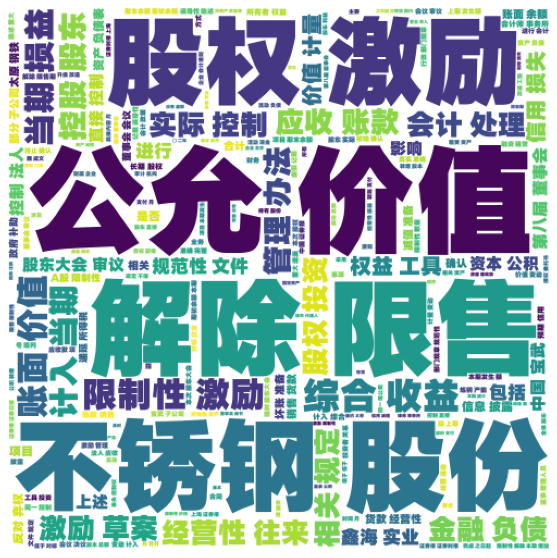

In [5]:
def draw_wordcloud (text, color = 'white'):
    wc = WordCloud(stopwords = STOPWORDS,
                      font_path="/Users/tiancaixiaohuoban/Desktop/高礼/互联网与文本分析/lec04/notebooks/Jieba-Tokenizer/HYQiHei-105.ttf",
                      background_color=color,
                      width=500,
                      height=500
                     ).generate(text)
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

contents_pos = ' '.join(data['cut_content'])
draw_wordcloud (contents_pos)

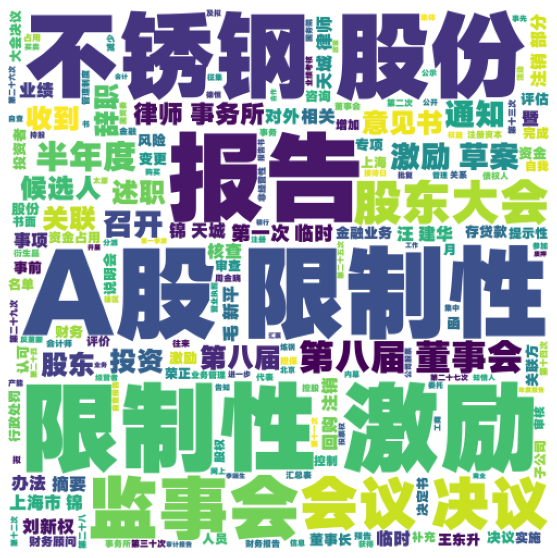

In [6]:
data['cut_title'] = data.title.apply(word_cut)
title_pos = ' '.join(data['cut_title'])
draw_wordcloud (title_pos)

In [7]:
!pip3 install gensim
from collections import defaultdict
from gensim import corpora

In [8]:
documents = data['cut_content']
#documents.head
stoplist = set('上市公司 资格 十二个 集团 单位 期间 以上 存在 2020 届满 最近 直系亲属 同意 违反 身份证 三十六 三十六个附属 现将 兼职 两次 超过 出席 意见 受到 登记 修订稿 在内'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

In [9]:
#texts

In [10]:
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

In [11]:
texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]
#print(texts)

In [12]:
dictionary = corpora.Dictionary(texts)
#print(dictionary.token2id)
#print()
#基于上述字典建立corpus
corpus = [dictionary.doc2bow(text) for text in texts]
#print(corpus)

In [13]:
from gensim import models
#tf-idf表达

#初始化tf-idf模型，主要是计算IDF
tfidf = models.TfidfModel(corpus)  
print(tfidf)

TfidfModel<num_docs=100, num_nnz=37606>


In [14]:
#得到每一个文档的TF-IDF表达，以稀疏矩阵的形式存储
corpus_tfidf = tfidf[corpus]
for doc, as_text in zip(corpus_tfidf, documents):
    print(doc, as_text)

[(0, 0.023248257702735163), (1, 0.09143285509837303), (2, 0.0462034501962035), (3, 0.04069360427094193), (4, 0.0120474900071919), (5, 0.03832153181176972), (6, 0.02140691756818104), (7, 0.05755428919459627), (8, 0.0658579119225002), (9, 0.0658579119225002), (10, 0.0658579119225002), (11, 0.0658579119225002), (12, 0.0658579119225002), (13, 0.0658579119225002), (14, 0.09893411246103823), (15, 0.03511467186490693), (16, 0.030538381791238266), (17, 0.0658579119225002), (18, 0.009461337637441194), (19, 0.08393159773570781), (20, 0.0658579119225002), (21, 0.12492565180061452), (22, 0.04946705623051911), (23, 0.1317158238450004), (24, 0.0658579119225002), (25, 0.07024939742503758), (26, 0.038276223691085125), (27, 0.05528548347195779), (28, 0.1331968460410388), (29, 0.0658579119225002), (30, 0.05528548347195779), (31, 0.05942108059216994), (32, 0.03948060338138865), (33, 0.04471305502141538), (34, 0.0789612067627773), (35, 0.0531983845257264), (36, 0.05755428919459627), (37, 0.051266032721484

In [15]:
#运行LSI, 以TFIDF表达为输入，为了绘图展示方便，选择参数2
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)  # 初始化LSI模型参数, K=2
corpus_lsi = lsi_model[corpus_tfidf]  #基于corpus_tfidf训练LSI模型

#打印出学习到的latent topic，一共2个
lsi_model.print_topics(2)

[(0,
  '-0.362*"激励" + -0.229*"限制性" + -0.148*"解除" + -0.128*"监事会" + -0.122*"股东" + -0.122*"限售" + -0.105*"监事" + -0.100*"会议" + -0.100*"附属" + -0.096*"中国证监会"'),
 (1,
  '0.338*"激励" + 0.214*"限制性" + -0.198*"附属" + 0.157*"解除" + 0.128*"限售" + -0.113*"候选人" + -0.112*"银保监会" + -0.112*"中共中央纪委" + -0.109*"中国证监会" + -0.103*"干部"')]

In [16]:
# 打印文档的topic表达，每一个文档表示成2维的topic向量
for doc, as_text in zip(corpus_lsi, documents):
    print(doc,as_text)

[(0, -0.5528679540556309), (1, -0.7685345556710493)] 代码 000825 编号 069 不锈钢 股份 不锈钢 股份 王东升 不锈钢 股份 第九届 董事会 候选人 发表 公开 书面 出任 不锈钢 股份 第九届 董事会 候选人 本次 充分 了解 职业 学历 专业 工作 经历 全部 作出 认为 符合 相关 行政 部门规章 规范性 文件 业务 规则 候选人 独立性 要求 如下 中华人民共和国 公司法 第一 百四十六 条 规定 不得 符合 中国证监会 规则 规定 条件 符合 规定 条件 参加 培训 认可 相关 证书 违反 中华人民共和国 公务员法 相关 规定 违反 中共中央纪委 规范 中管 干部 辞去 公职 退 基金 管理 监事 通知 相关 规定 违反 中共中央组织部 进一步 规范 党政领导 干部 企业 问题 相关 规定 违反 中共中央纪委 教育部 监察部 加强 高等学校 反腐倡廉 建设 相关 规定 违反 中国人民银行 股份制 商业银行 外部 监事 制度 指引 相关 规定 违反 中国证监会 证券公司 监事 管理人员 监管 办法 相关 规定 十一 违反 中国 银保监会 银行业 金融机构 理事 管理人员 管理 办法 相关 规定 违反 中国 银保监会 保险公司 监事 管理人员 管理 规定 保险机构 管理 办法 相关 规定 十三 违反 行政 部门规章 规范性 文件 业务 规则 相关 规定 十四 具备 运作 相关 基本知识 熟悉 相关 行政 部门规章 规范性 文件 业务 规则 具有 五年 履行 职责 必需 工作 经验 十五 主要 社会关系 附属 企业 直接 间接 持有 发行 股份 1% 股东 前十名 股东 自然人 股东 十七 直接 间接 持有 发行 股份 5% 股东 五名 股东 十八 控股 股东 实际 控制 附属 企业 十九 控股 股东 实际 控制 附属 企业 提供 财务 咨询 服务 人员 包括 限于 提供 服务 中介机构 项目组 全体人员 各级 复核 人员 报告 签字 人员 合伙人 主要 负责人 二十 控股 股东 实际 控制 附属 企业 重大 业务 往来 重大 业务 往来 控股 股东 二十一 月 具有 六项 所列任 一种 二十二 中国证监会 采取 证券市场 禁入 措施 期限 尚未 人员 二十三 公开 认定 适合 监事 管理人员 期限

In [17]:
list1=[]
for doc in zip(corpus_lsi, documents):
    list1+=doc[0]

In [18]:
i=0
list_tf_idf0=[]
list_tf_idf1=[]
for i in range(len(list1)):
    if i%2==0:
        list_tf_idf0+=list1[i]
    else:
        list_tf_idf1+=list1[i]

In [19]:
for i in range(95):
    list_tf_idf0.remove(0)
#list_tf_idf0
    list_tf_idf1.remove(1)

In [20]:
df_tf_idf0=pd.DataFrame(list_tf_idf0)
df_tf_idf1=pd.DataFrame(list_tf_idf1)

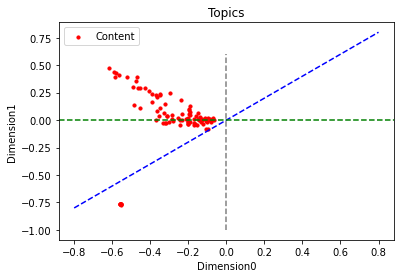

In [21]:
plt.scatter(df_tf_idf0[:], df_tf_idf1[:], s = 10, c = 'r', label = 'Content')
plt.title('Topics')
plt.xlabel('Dimension0')
plt.ylabel('Dimension1')
t = np.linspace(-0.8, 0.8, 190)
x=np.linspace(0,0,190)
plt.plot(t, t, 'b--')
plt.axhline(y=0, ls="--", c="g")
plt.vlines([0],-1,0.6, ls="--", colors="grey")
plt.legend()
plt.show()

In [22]:
data=data.sort_values(by=["date"],ascending=True)#对公告进行基于日期的升序排列

<AxesSubplot:xlabel='date', ylabel='Count'>

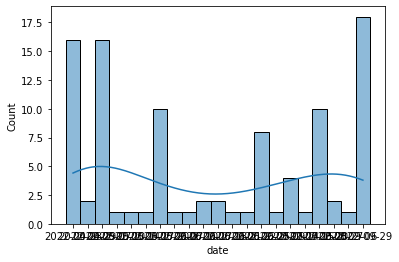

In [23]:
import seaborn as sns

sns.histplot(data=data, x="date",kde=True, palette='muted',bins=20,shrink=1,discrete=True)